# Introduction to Pytorch

It’s a Python based scientific computing package targeted at two sets of audiences:

Tensorial library that uses the power of GPUs
A deep learning research platform that provides maximum flexibility and speed

take a loot here to install pytorch: https://pytorch.org/get-started/locally/

In [1]:
#!pip install torch torchvision
import torch  # <Ctrl> / <Shift> + <Return>
x = torch.rand(5, 3) 
print(x)

tensor([[0.1330, 0.3347, 0.0204],
        [0.2120, 0.6204, 0.5785],
        [0.7727, 0.2564, 0.5121],
        [0.5113, 0.5487, 0.5480],
        [0.7578, 0.1906, 0.9821]])


## Getting Help in Jupyter

In [2]:
torch.sq  # <Tab

AttributeError: ignored

In [ ]:
# What about all `*Tensor`s?
# Press <esc> to get out of help
torch.*Tensor

In [ ]:
torch.nn.Module()  # <Shift>+<Tab>

In [ ]:
# Annotate your functions / classes!
torch.nn.Module?

In [ ]:
torch.nn.Module??

## Dropping to Bash: magic!

In [4]:
#list of all the files in the directory
!ls -lrt 

total 4
drwxr-xr-x 1 root root 4096 Dec  3 14:33 sample_data


In [5]:
%%bash 
# List all the files but with cleaner outputs for readability
for f in $(ls *.*); do
    echo $(wc -l $f)
done

ls: cannot access '*.*': No such file or directory


In [6]:

# Getting some general help
%magic


## Python native data types
Python has many native datatypes. Here are the important ones:

* **Booleans** are either True or False.
* **Numbers** can be integers (1 and 2), floats (1.1 and 1.2), fractions (1/2 and 2/3), or even complex numbers.
* **Strings** are sequences of Unicode characters, e.g. an html document.
* **Lists** are ordered sequences of values.
* **Tuples** are ordered, immutable sequences of values.
* **Sets** are unordered bags of values.
* **Dictionaries** are unordered bags of key-value pairs.


See [here](https://diveintopython3.net/native-datatypes.html) for a complete overview.

**More resources**
* Brief Python introduction [here](https://learnxinyminutes.com/docs/python3/).
* Full Python tutorial [here](https://docs.python.org/3/tutorial/).
* A Whirlwind Tour of Python [here](https://github.com/jakevdp/WhirlwindTourOfPython).
* Python Data Science Handbook [here](https://github.com/jakevdp/PythonDataScienceHandbook).

## Let's talk about Pytorch!!

In [7]:
# Generate a tensor of size 2x3x4
t = torch.Tensor(2, 3, 4)
type(t)

torch.Tensor

In [8]:
# Get the size of the tensor
t.size()

torch.Size([2, 3, 4])

In [9]:
# t.size() is a classic tuple =>
print('t size:', ' \u00D7 '.join(map(str, t.size())))


t size: 2 × 3 × 4


In [10]:
# prints dimensional space and sub-dimensions
print(f'point in a {t.numel()} dimensional space')
print(f'organised in {t.dim()} sub-dimensions')

point in a 24 dimensional space
organised in 3 sub-dimensions


In [11]:
# Mind the underscore!
# Any operation that mutates a tensor in-place is post-fixed with an _.
# For example: x.copy_(y), x.t_(), x.random_(n) will change x.
t.random_(10)

tensor([[[2., 7., 7., 2.],
         [2., 8., 3., 6.],
         [5., 3., 5., 4.]],

        [[1., 3., 6., 7.],
         [9., 1., 4., 8.],
         [7., 3., 5., 7.]]])

In [12]:
# This resizes the tensor permanently 
r = torch.Tensor(t)
r.resize_(3, 8)
r

tensor([[2., 7., 7., 2., 2., 8., 3., 6.],
        [5., 3., 5., 4., 1., 3., 6., 7.],
        [9., 1., 4., 8., 7., 3., 5., 7.]])

In [13]:
# As you can see zero_ would replace r with 0's which was originally filled with integers
r.zero_()


tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [14]:
# This *is* important, sigh...
s = r.clone()

In [15]:
# In-place fill of 1's
s.fill_(1)
s

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [16]:
# Because we cloned r, even though we did an in-place operation, this doesn't affect r
r

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

# 1-D Tensors

In [17]:
# Creates a 1D tensor of integers 1 to 4
v = torch.Tensor([1, 2, 3, 4])
v

tensor([1., 2., 3., 4.])

In [18]:

# Print number of dimensions (1D) and size of tensor
print(f'dim: {v.dim()}, size: {v.size()[0]}')

dim: 1, size: 4


In [19]:

w = torch.Tensor([1, 0, 2, 0])
w

tensor([1., 0., 2., 0.])

In [20]:
# Element-wise multiplication
v * w

tensor([1., 0., 6., 0.])

In [21]:
# Scalar product: 1*1 + 2*0 + 3*2 + 4*0
v @ w

tensor(7.)

In [22]:
# In-place replacement of random number from 0 to 10
x = torch.Tensor(5).random_(10)
x

tensor([1., 8., 3., 7., 6.])

In [23]:
print(f'first: {x[0]}, last: {x[-1]}')


first: 1.0, last: 6.0


In [24]:

# Extract sub-Tensor [from:to)
x[1:2 + 1]

tensor([8., 3.])

In [25]:
# Create a tensor with integers ranging from 1 to 5, excluding 5
v = torch.arange(1, 4 + 1)
v

tensor([1, 2, 3, 4])

In [26]:
# Square all elements in the tensor
print(v.pow(2), v)

tensor([ 1,  4,  9, 16]) tensor([1, 2, 3, 4])


In [27]:
#Bridge with NumPy
#!pip install numpy
import numpy as np

t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")


t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [28]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


## Matrices (2D Tensors)


In [29]:
# Create a 2x4 tensor
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [30]:
m.dim()

2

In [31]:
print(m.size(0), m.size(1), m.size(), sep=' -- ')
# Returns the total number of elements, hence num-el (number of elements)
m.numel()


2 -- 4 -- torch.Size([2, 4])


8

In [32]:
# Indexing row 0, column 2 (0-indexed)
m[0][2]

tensor(3.)

In [33]:

# Indexing row 0, column 2 (0-indexed)
m[0, 2]

tensor(3.)

In [34]:

# Indexing column 1, all rows (returns size 2)
m[:, 1]

tensor([5., 2.])

In [35]:
# Indexing column 1, all rows (returns size 2x2)
m[:, [1]]

tensor([[5.],
        [2.]])

In [36]:
# Create tensor of numbers from 1 to 5 (excluding 5)
v = torch.arange(1., 4 + 1)
v

tensor([1., 2., 3., 4.])

In [37]:
# Scalar product
m @ v

tensor([49., 47.])

In [38]:
# Calculated by 1*2 + 2*5 + 3*3 + 4*7
m[[0], :] @ v

tensor([49.])

In [39]:
# Calculated by 
m[[1], :] @ v

tensor([47.])

In [40]:
# Add a random tensor of size 2x4 to m
m + torch.rand(2, 4)

tensor([[2.3837, 5.8372, 3.1134, 7.0549],
        [4.0058, 2.4256, 1.7431, 9.5077]])

In [41]:
# Subtract a random tensor of size 2x4 to m
m - torch.rand(2, 4)

tensor([[1.9076, 4.8135, 2.7217, 6.5765],
        [3.3183, 1.5424, 0.3229, 8.6066]])

In [42]:
# Multiply a random tensor of size 2x4 to m
m * torch.rand(2, 4)

tensor([[1.5635, 0.9077, 1.9731, 2.4773],
        [1.2810, 1.8069, 0.1224, 0.0226]])

In [43]:
# Divide m by a random tensor of size 2x4
m / torch.rand(2, 4)

tensor([[ 2.0628,  9.8510,  3.0102,  7.2701],
        [ 6.8624,  3.5252,  1.4253, 27.4386]])

In [44]:
m.size()


torch.Size([2, 4])

In [45]:
# Transpose tensor m, which is essentially 2x4 to 4x2
m.t()


tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

In [46]:
# Same as
m.transpose(0, 1)

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

## Constructors

In [47]:
# Create tensor from 3 to 8, with each having a space of 1
torch.arange(3., 8 + 1)

tensor([3., 4., 5., 6., 7., 8.])

In [48]:
# Create tensor from 5.7 to -2.1 with each having a space of -3
torch.arange(5.7, -2.1, -3)

tensor([ 5.7000,  2.7000, -0.3000])

In [49]:
# returns a 1D tensor of steps equally spaced points between start=3, end=8 and steps=20
torch.linspace(3, 8, 20).view(1, -1)

tensor([[3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
         5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
         7.7368, 8.0000]])

In [50]:
# Create a tensor filled with 0's
torch.zeros(3, 5)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [51]:
# Create a tensor filled with 1's
torch.ones(3, 2, 5)


tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [52]:
# Create a tensor with the diagonal filled with 1
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [64]:
from matplotlib import pyplot as plt
import numpy as np
import torch
from IPython.display import HTML, display


def set_default(figsize=(10, 10), dpi=100):
    plt.style.use(['dark_background', 'bmh'])
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=figsize, dpi=dpi)


def plot_data(X, y, d=0, auto=False, zoom=1):
    X = X.cpu()
    y = y.cpu()
    plt.scatter(X.numpy()[:, 0], X.numpy()[:, 1], c=y, s=20, cmap=plt.cm.Spectral)
    plt.axis('square')
    plt.axis(np.array((-1.1, 1.1, -1.1, 1.1)) * zoom)
    if auto is True: plt.axis('equal')
    plt.axis('off')

    _m, _c = 0, '.15'
    plt.axvline(0, ymin=_m, color=_c, lw=1, zorder=0)
    plt.axhline(0, xmin=_m, color=_c, lw=1, zorder=0)


def plot_model(X, y, model):
    model.cpu()
    mesh = np.arange(-1.1, 1.1, 0.01)
    xx, yy = np.meshgrid(mesh, mesh)
    with torch.no_grad():
        data = torch.from_numpy(np.vstack((xx.reshape(-1), yy.reshape(-1))).T).float()
        Z = model(data).detach()
    Z = np.argmax(Z, axis=1).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plot_data(X, y)


def show_scatterplot(X, colors, title=''):
    colors = colors.cpu().numpy()
    X = X.cpu().numpy()
    plt.figure()
    plt.axis('equal')
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=30)
    # plt.grid(True)
    plt.title(title)
    plt.axis('off')


def plot_bases(bases, width=0.04):
    bases = bases.cpu()
    bases[2:] -= bases[:2]
    plt.arrow(*bases[0], *bases[2], width=width, color=(1,0,0), zorder=10, alpha=1., length_includes_head=True)
    plt.arrow(*bases[1], *bases[3], width=width, color=(0,1,0), zorder=10, alpha=1., length_includes_head=True)


def show_mat(mat, vect, prod, threshold=-1):
    # Subplot grid definition
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=False, sharey=True,
                                        gridspec_kw={'width_ratios':[5,1,1]})
    # Plot matrices
    cax1 = ax1.matshow(mat.numpy(), clim=(-1, 1))
    ax2.matshow(vect.numpy(), clim=(-1, 1))
    cax3 = ax3.matshow(prod.numpy(), clim=(threshold, 1))

    # Set titles
    ax1.set_title(f'A: {mat.size(0)} \u00D7 {mat.size(1)}')
    ax2.set_title(f'a^(i): {vect.numel()}')
    ax3.set_title(f'p: {prod.numel()}')

    # Remove xticks for vectors
    ax2.set_xticks(tuple())
    ax3.set_xticks(tuple())
    
    # Plot colourbars
    fig.colorbar(cax1, ax=ax2)
    fig.colorbar(cax3, ax=ax3)

    # Fix y-axis limits
    ax1.set_ylim(bottom=max(len(prod), len(vect)) - 0.5)


colors = dict(
    aqua='#8dd3c7',
    yellow='#ffffb3',
    lavender='#bebada',
    red='#fb8072',
    blue='#80b1d3',
    orange='#fdb462',
    green='#b3de69',
    pink='#fccde5',
    grey='#d9d9d9',
    violet='#bc80bd',
    unk1='#ccebc5',
    unk2='#ffed6f',
)


def _cstr(s, color='black'):
    if s == ' ':
        return f'<text style=color:#000;padding-left:10px;background-color:{color}> </text>'
    else:
        return f'<text style=color:#000;background-color:{color}>{s} </text>'

# print html
def _print_color(t):
    display(HTML(''.join([_cstr(ti, color=ci) for ti, ci in t])))

# get appropriate color for value
def _get_clr(value):
    colors = ('#85c2e1', '#89c4e2', '#95cae5', '#99cce6', '#a1d0e8',
              '#b2d9ec', '#baddee', '#c2e1f0', '#eff7fb', '#f9e8e8',
              '#f9e8e8', '#f9d4d4', '#f9bdbd', '#f8a8a8', '#f68f8f',
              '#f47676', '#f45f5f', '#f34343', '#f33b3b', '#f42e2e')
    value = int((value * 100) / 5)
    if value == len(colors): value -= 1  # fixing bugs...
    return colors[value]

def _visualise_values(output_values, result_list):
    text_colours = []
    for i in range(len(output_values)):
        text = (result_list[i], _get_clr(output_values[i]))
        text_colours.append(text)
    _print_color(text_colours)

def print_colourbar():
    color_range = torch.linspace(-2.5, 2.5, 20)
    to_print = [(f'{x:.2f}', _get_clr((x+2.5)/5)) for x in color_range]
    _print_color(to_print)


# Let's only focus on the last time step for now
# First, the cell state (Long term memory)
def plot_state(data, state, b, decoder):
    actual_data = decoder(data[b, :, :].numpy())
    seq_len = len(actual_data)
    seq_len_w_pad = len(state)
    for s in range(state.size(2)):
        states = torch.sigmoid(state[:, b, s])
        _visualise_values(states[seq_len_w_pad - seq_len:], list(actual_data))

In [65]:
# Set default plots
from matplotlib import pyplot as plt
set_default()

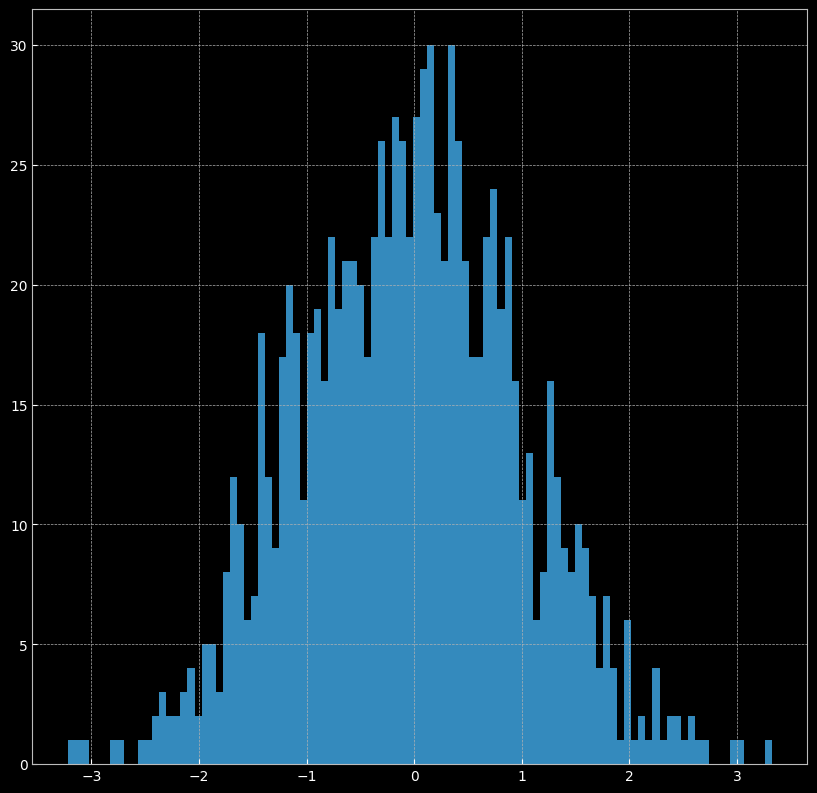

In [66]:
  # Numpy bridge!
plt.hist(torch.randn(1000).numpy(), 100);

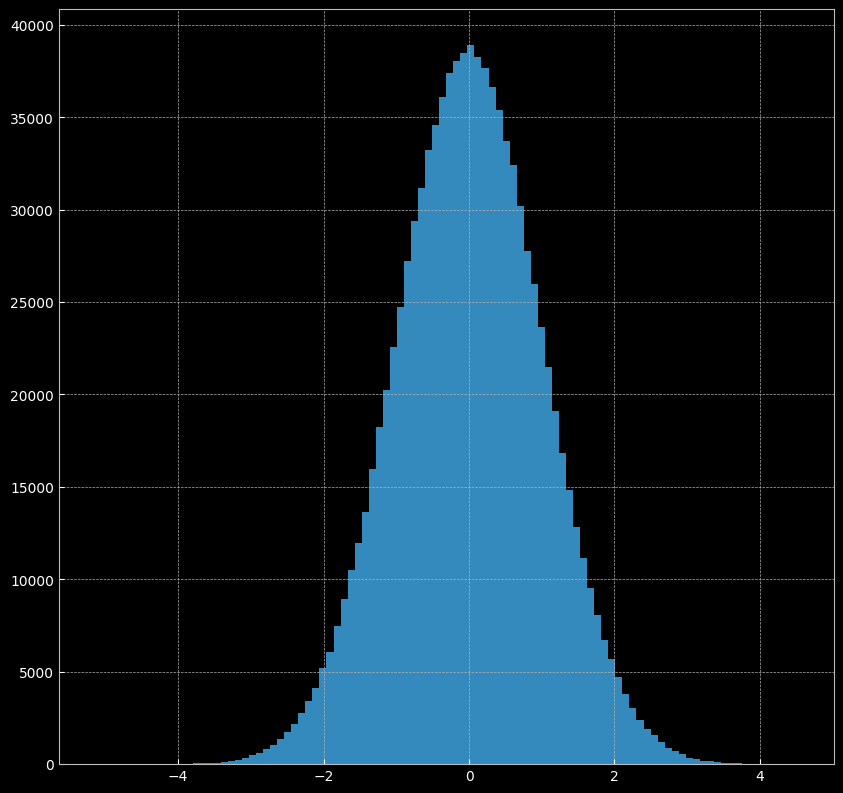

In [67]:
plt.hist(torch.randn(10**6).numpy(), 100);  # how much does this chart weight?
# use rasterized=True for SVG/EPS/PDF!

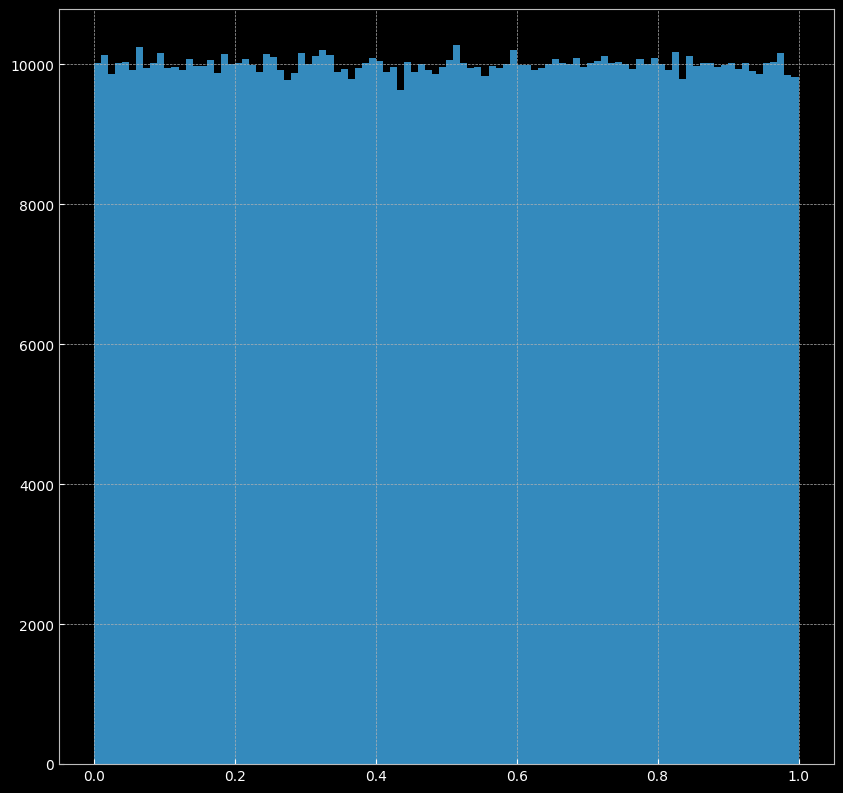

In [68]:
plt.hist(torch.rand(10**6).numpy(), 100);

## Casting

In [69]:
# Helper to get what kind of tensor types
torch.*Tensor?

In [70]:
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [71]:
# This is basically a 64 bit float tensor
m_double = m.double()
m_double

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]], dtype=torch.float64)

In [72]:
# This creates a tensor of type int8
m_byte = m.byte()
m_byte

tensor([[2, 5, 3, 7],
        [4, 2, 1, 9]], dtype=torch.uint8)

In [73]:
# Move your tensor to GPU device 0 if there is one (first GPU in the system)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
m.to(device)

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [74]:
# Converts tensor to numpy array
m_np = m.numpy()
m_np

array([[2., 5., 3., 7.],
       [4., 2., 1., 9.]], dtype=float32)

In [75]:
# In-place fill of column 0 and row 0 with value -1
m_np[0, 0] = -1
m_np

array([[-1.,  5.,  3.,  7.],
       [ 4.,  2.,  1.,  9.]], dtype=float32)

In [76]:
m

tensor([[-1.,  5.,  3.,  7.],
        [ 4.,  2.,  1.,  9.]])

In [77]:
# Create a tensor of integers ranging from 0 to 4
import numpy as np
n_np = np.arange(5)
n = torch.from_numpy(n_np)
print(n_np, n)

[0 1 2 3 4] tensor([0, 1, 2, 3, 4])


In [78]:
# In-place multiplication of all elements by 2 for tensor n
# Because n is essentiall n_np, not a clone, this affects n_np
n.mul_(2)
n_np

array([0, 2, 4, 6, 8])

## For you to do!!

In [79]:
# Creates two tensor of size 1x4

# Concatenate on axis 0, so you get 2x4

# Concatenate on axis 1, so you get 1x8

Torch full API should be read at least once. Hence, go [here](https://pytorch.org/docs/stable/index.html).

 You'll find 100+ Tensor operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random numbers, etc are described.